# Importing Libraries

In [1]:
import math as ma
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Getting inputs:
Number of elements, Number of nodes, Number of fixed nodes, Fixed nodes, Starting and ending node for each element,
Area of each element, Modulus of Elasticity of each element, Coordinates of each node

In [3]:

##### Adding codes for 2D elements

element_count=int(input('Number of elements:'))
node_count=int(input('Number of nodes:'))
fixed_count=int(input('Number of Fixed Nodes:'))
fixed_nodes=np.array([int(input('Node number-Please provide fixed nodes in increasing order:')) for i in range(fixed_count)])
C=np.zeros((element_count,2))
for i in range(element_count):
    C[i][0]=int(input('First node of element {} '.format(int(i+1))))
    C[i][1]=int(input('Last node of element {} '.format(int(i+1))))
    

A=np.zeros(element_count)
E=np.zeros(element_count)
l=np.zeros(element_count)
k=np.zeros((element_count,6,6))
node_xyz=np.zeros((node_count,3))
F=np.zeros(node_count*3)
theta=np.zeros(element_count)
for i in range(element_count):
    A[i]=float(input("Area of element {} :".format(int(i+1))))
for i in range(element_count):
    E[i]=float(input("Modulus of elasticity of element {} :".format(int(i+1))))
for i in range(node_count):
    for j in range(3):
        node_xyz[i][j]=float(input("Enter {} coordinate of node {}:".format(chr(ord('x')+j),int(i+1))))
 


Number of elements:25
Number of nodes:10
Number of Fixed Nodes:4
Node number-Please provide fixed nodes in increasing order:7
Node number-Please provide fixed nodes in increasing order:8
Node number-Please provide fixed nodes in increasing order:9
Node number-Please provide fixed nodes in increasing order:10
First node of element 1 1
Last node of element 1 2
First node of element 2 1
Last node of element 2 4
First node of element 3 2
Last node of element 3 3
First node of element 4 1
Last node of element 4 5
First node of element 5 2
Last node of element 5 6
First node of element 6 2
Last node of element 6 4
First node of element 7 2
Last node of element 7 5
First node of element 8 1
Last node of element 8 3
First node of element 9 1
Last node of element 9 6
First node of element 10 3
Last node of element 10 6
First node of element 11 4
Last node of element 11 5
First node of element 12 3
Last node of element 12 4
First node of element 13 5
Last node of element 13 6
First node of eleme

# Transformation of stiffness matrix:
The transformed stiffness matrix for each element (in global coordinates) is computed using transformation matrix (Direction ratios)

In [7]:
for i in range(element_count):
    l[i]=np.linalg.norm(node_xyz[int(C[i][1]-1)]-node_xyz[int(C[i][0]-1)])
    cos = (node_xyz[int(C[i][1]-1)]-node_xyz[int(C[i][0]-1)])*(1/l[i])
    k[i] = (A[i]*E[i]/l[i])*np.array([[cos[0]*cos[0],cos[0]*cos[1],cos[0]*cos[2],-cos[0]*cos[0],-cos[0]*cos[1],-cos[0]*cos[2]],
                    [cos[1]*cos[0],cos[1]*cos[1],cos[1]*cos[2],-cos[1]*cos[1],-cos[1]*cos[1],-cos[1]*cos[2]],
                    [cos[2]*cos[2],cos[2]*cos[1],cos[2]*cos[2],-cos[2]*cos[1],-cos[2]*cos[1],-cos[2]*cos[2]],
                    [-cos[0]*cos[0],-cos[0]*cos[1],-cos[0]*cos[2],cos[0]*cos[0],cos[0]*cos[1],cos[0]*cos[2]],
                    [-cos[1]*cos[1],-cos[1]*cos[1],-cos[1]*cos[2],cos[1]*cos[0],cos[1]*cos[1],cos[1]*cos[2]],
                    [-cos[2]*cos[1],-cos[2]*cos[1],-cos[2]*cos[2],cos[2]*cos[2],cos[2]*cos[1],cos[2]*cos[2]]])

# Computing Global stiffness matrix:
The global stiffness matrix for each element is computed by assembling the individual stiffness matrices 

In [8]:
# Assembly of Global stiffness matrix
K_global = np.zeros((node_count*3,node_count*3))
for e in range(element_count):
    # Get the nodes for this element
    node = C[e]-1
    # Loop over each node in the element
    for i in range(len(node)):
        # Loop over each degree of freedom for node i
        for j in range(3):
            # Loop over each node in the element
            for b in range(len(node)):
                # Loop over each degree of freedom for node k
                for o in range(3):
                    # Add the corresponding element stiffness matrix term to the global stiffness matrix
                    K_global[3*int(node[i])+j, 3*int(node[b])+o] += k[e][3*i+j, 3*b+o]


# Boundary Conditions:
The boundary conditions (fixed nodes, nodal loads) are applied

In [9]:
#### Applying Boundary Conditions

K=K_global
K1=K.copy()
K_temp1=K1
for i in fixed_nodes-1:
    K_temp1[3*i][:] = 0
    K_temp1[3*i+1][:] = 0
    K_temp1[3*i+2][:] = 0
    K_temp1.T[:][3*i] = 0
    K_temp1.T[:][3*i+1] = 0
    K_temp1.T[:][3*i+2] = 0
# Select non-zero rows
K_temp1 = K_temp1[~np.all(K_temp1 == 0, axis=1)]
#Select non-zero columns
K_temp1 = K_temp1[:, ~np.all(K_temp1 == 0, axis=0)]



In [52]:
### Accepting force
F=np.zeros(node_count*3)
for i in range(node_count):
    for j in range(3):
        F[3*i+j]=float(input("Load at node {} - {} coordinate:".format(int(i+1),chr(ord('x')+j))))

Load at node 1 - x coordinate:0
Load at node 1 - y coordinate:60000
Load at node 1 - z coordinate:0
Load at node 2 - x coordinate:0
Load at node 2 - y coordinate:60000
Load at node 2 - z coordinate:0
Load at node 3 - x coordinate:0
Load at node 3 - y coordinate:0
Load at node 3 - z coordinate:0
Load at node 4 - x coordinate:0
Load at node 4 - y coordinate:0
Load at node 4 - z coordinate:0
Load at node 5 - x coordinate:0
Load at node 5 - y coordinate:0
Load at node 5 - z coordinate:0
Load at node 6 - x coordinate:0
Load at node 6 - y coordinate:0
Load at node 6 - z coordinate:0
Load at node 7 - x coordinate:0
Load at node 7 - y coordinate:0
Load at node 7 - z coordinate:0
Load at node 8 - x coordinate:0
Load at node 8 - y coordinate:0
Load at node 8 - z coordinate:0
Load at node 9 - x coordinate:0
Load at node 9 - y coordinate:0
Load at node 9 - z coordinate:0
Load at node 10 - x coordinate:0
Load at node 10 - y coordinate:0
Load at node 10 - z coordinate:0


# Solving for nodal displacements:
The fixed nodes entries are removed to solve for the other nodal displacements

In [53]:
F_temp1 = np.delete(F, np.array((3*(fixed_nodes-1),3*np.array(fixed_nodes-1)+1,3*np.array(fixed_nodes-1)+2))) #Deleting fixed nodes entries

In [54]:
## Solving for nodal displacements
x = np.linalg.solve(K_temp1,F_temp1)
u=np.zeros(node_count*3)

g= [i for i in range(node_count) if i not in list(fixed_nodes-1)]
for i in g:
    u[3*i]=x[i]
    u[3*i+1]=x[i+1]
    u[3*i+2]=x[i+2]

# Computing elemental quantities:
The elemental quantities (in local coordinates)- axial displacements, elemental forces and stresses are computed from nodal displacements

In [55]:
### Finding elemental axial displacements, stresses   
###### Transfroming global findings to local settings to find elemental, deformations, stresses and loads
#Finding axial displacements and axial forces for each elements
u_loc=np.zeros((element_count,2))
F_loc=np.zeros((element_count,2))
sigma=np.zeros(element_count)
u_ele=np.zeros(6)
for i in range(element_count):
    l[i]=np.linalg.norm(node_xyz[int(C[i][1]-1)]-node_xyz[int(C[i][0]-1)])
    cos = (node_xyz[int(C[i][1]-1)]-node_xyz[int(C[i][0]-1)])*(1/l[i])
    T=np.array([[cos[0],cos[1],cos[2],0,0,0],[0,0,0,cos[0],cos[1],cos[2]]])
    u_ele = np.array([u[int(3*(C[i][0]-1))],u[int(3*(C[i][0]-1)+1)],u[int(3*(C[i][0]-1)+2)],u[int(3*(C[i][1]-1))],u[int(3*(C[i][1]-1)+1)],u[int(3*(C[i][1]-1)+2)]])
    u_loc[i] = np.matmul(T,np.transpose(u_ele))
    k_ele = (A[i]*E[i]/l[i])*np.array([[1,-1],[-1,1]])                 
    F_loc[i] = np.matmul(k_ele,np.transpose(u_loc[i]))
    sigma[i] = F_loc[i][1]*(1/A[i])                  

In [57]:
node_u = np.zeros((node_count,3))
for i in range(node_count):
    for j in range(3):
        node_u[i][j]=u[3*i+j]

# Printing results:

In [58]:
df_u = pd.DataFrame(data=node_u, columns = ['x','y','z'], index=["Node 1", "Node 2", "Node 3", "Node 4","Node 5","Node 6","Node 7","Node 8","Node 9","Node 10"])

In [59]:
print("Nodal Displacements (in inches):\n")
df_u

Nodal Displacements (in inches):



,x,y,z
Node 1,-0.000006,0.018524,0.000248
Node 2,0.018524,0.000248,-0.000039
Node 3,0.000248,-0.000039,0.018759
Node 4,-0.000039,0.018759,0.000249
Node 5,0.018759,0.000249,-0.000322
Node 6,0.000249,-0.000322,0.001587
Node 7,0.000000,0.000000,0.000000
Node 8,0.000000,0.000000,0.000000
Node 9,0.000000,0.000000,0.000000
Node 10,0.000000,0.000000,0.000000


In [60]:
df_u = pd.DataFrame(data=node_u*25.4, columns = ['x','y','z'], index=["Node 1", "Node 2", "Node 3", "Node 4","Node 5","Node 6","Node 7","Node 8","Node 9","Node 10"])
print("Nodal Displacements (in mm):\n")
df_u

Nodal Displacements (in mm):



,x,y,z
Node 1,-0.000148,0.470499,0.006308
Node 2,0.470499,0.006308,-0.001001
Node 3,0.006308,-0.001001,0.476470
Node 4,-0.001001,0.476470,0.006320
Node 5,0.476470,0.006320,-0.008180
Node 6,0.006320,-0.008180,0.040303
Node 7,0.000000,0.000000,0.000000
Node 8,0.000000,0.000000,0.000000
Node 9,0.000000,0.000000,0.000000
Node 10,0.000000,0.000000,0.000000


In [61]:
df_stress = pd.DataFrame(data=sigma, columns=["Stress"], index=["Element 1", "Element 2", "Element 3", "Element 4","Element 5","Element 6","Element 7","Element 8","Element 9","Element 10","Element 11","Element 12","Element 13","Element 14","Element 15","Element 16","Element 17","Element 18","Element 19","Element 20","Element 21","Element 22","Element 23","Element 24","Element 25"])

In [62]:
print("Element Stresses (in psi):\n")
df_stress

Element Stresses (in psi):



,Stress
Element 1,185293.860150
Element 2,275.266681
Element 3,-22897.079154
Element 4,94664.749007
Element 5,54137.997431
Element 6,43746.819514
Element 7,1857.373948
Element 8,-167483.392912
Element 9,37668.287170
Element 10,2826.508549


In [63]:
df_stress = pd.DataFrame(data=sigma*0.00689476, columns=["Stress"], index=["Element 1", "Element 2", "Element 3", "Element 4","Element 5","Element 6","Element 7","Element 8","Element 9","Element 10","Element 11","Element 12","Element 13","Element 14","Element 15","Element 16","Element 17","Element 18","Element 19","Element 20","Element 21","Element 22","Element 23","Element 24","Element 25"])
print("Element Stresses (in MPa):\n")
df_stress

Element Stresses (in MPa):



,Stress
Element 1,1277.556695
Element 2,1.897898
Element 3,-157.869865
Element 4,652.690725
Element 5,373.268499
Element 6,301.623821
Element 7,12.806148
Element 8,-1154.757798
Element 9,259.713800
Element 10,19.488098


# Plotting the deformed structure (Scaled) with original structure

C:\Users\sujay\AppData\Local\Temp/ipykernel_16888/2153929557.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  plt.gca(projection='3d')


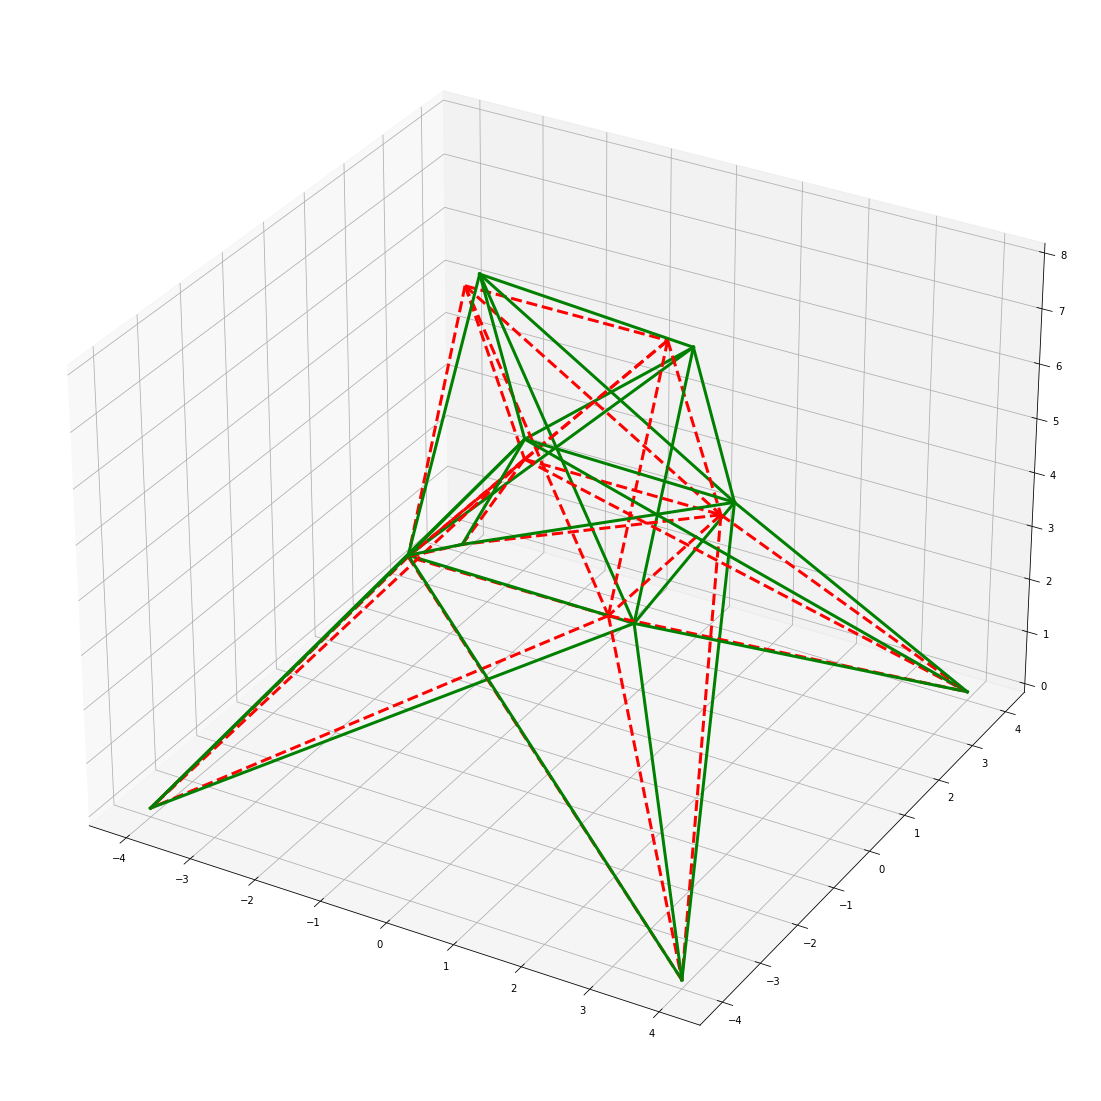

In [81]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.gca(projection='3d')

s=20 #Scale
for i in range(element_count):
    u_ele = np.array([u[int(3*(C[i][0]-1))],u[int(3*(C[i][0]-1)+1)],u[int(3*(C[i][0]-1)+2)],u[int(3*(C[i][1]-1))],u[int(3*(C[i][1]-1)+1)],u[int(3*(C[i][1]-1)+2)]])
    xi = node_xyz[int(C[i][0]-1)][0]
    xdi = xi+ s*u_ele[0]
    xf = node_xyz[int(C[i][1]-1)][0]
    xdf = xf+ s*u_ele[3]
    yi = node_xyz[int(C[i][0]-1)][1]
    ydi = yi+ s*u_ele[1]
    yf = node_xyz[int(C[i][1]-1)][1]
    ydf = yf+ s*u_ele[4]
    zi = node_xyz[int(C[i][0]-1)][2]
    zdi = zi+ s*u_ele[2]
    zf = node_xyz[int(C[i][1]-1)][2]
    zdf = zf+ s*u_ele[5]
    line1 = plt.plot([xi,xf],[yi,yf],[zi,zf],color='red',linestyle='--',linewidth=3)
    line2 = plt.plot([xdi,xdf],[ydi,ydf],[zdi,zdf],color='green',linestyle='-',linewidth=3)
                       